# Report Graphics

Graphics for the report

**This is not filtering duplicated samples**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

pe32_av = pd.read_csv('data/mined_data/pe32_static_av.csv', dtype=str)
pe32_av = pe32_av.set_index('link')

## Unique names by each vendor

Reasoning: Many detections + many variants

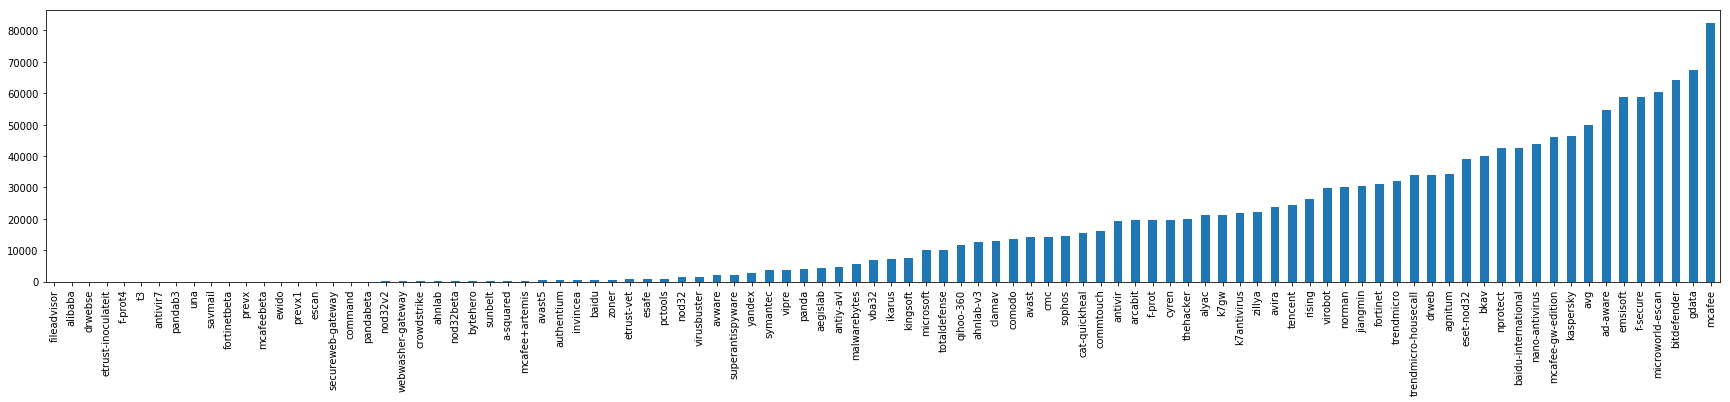

count       96.000000
mean     15870.572917
std      19596.910877
min          0.000000
25%        112.250000
50%       7121.000000
75%      24764.750000
max      82446.000000
dtype: float64

In [72]:
vendors_unique_names = pe32_av.replace('clean', np.nan).apply(pd.Series.nunique).sort_values()
vendors_unique_names.plot(kind='bar', figsize=(30, 5), xticks=np.arange(len(vendors_unique_names)))
plt.xticks(rotation='vertical')
plt.show()

display(vendors_unique_names.describe())

# Count of different classifications number

Reasoning: vendors classify samples differently (due to naming conventions + disagreement on malware)

**Problem:** Can't distinguish between samples where only 1 vendors classified from samples where vendors only use 1 name

In [126]:
vendors_class_count = pe32_av.replace('clean', np.nan).apply(pd.Series.nunique, axis=1)
vendors_class_count = vendors_class_count[vendors_class_count != 0].value_counts()

vendors_class_count.plot(kind='bar', figsize=(20, 10), xticks=np.arange(len(vendors_class_count)))
plt.show()

# Unique names on Top 20

In [139]:
av_presence = pe32_av.count() / len(pe32_av)
av_presence.sort_values(inplace=True, ascending=False)

av_top20 = av_presence[:20]
pe32_av_top = pe32_av.filter(items=['link'] + list(av_top20.index))

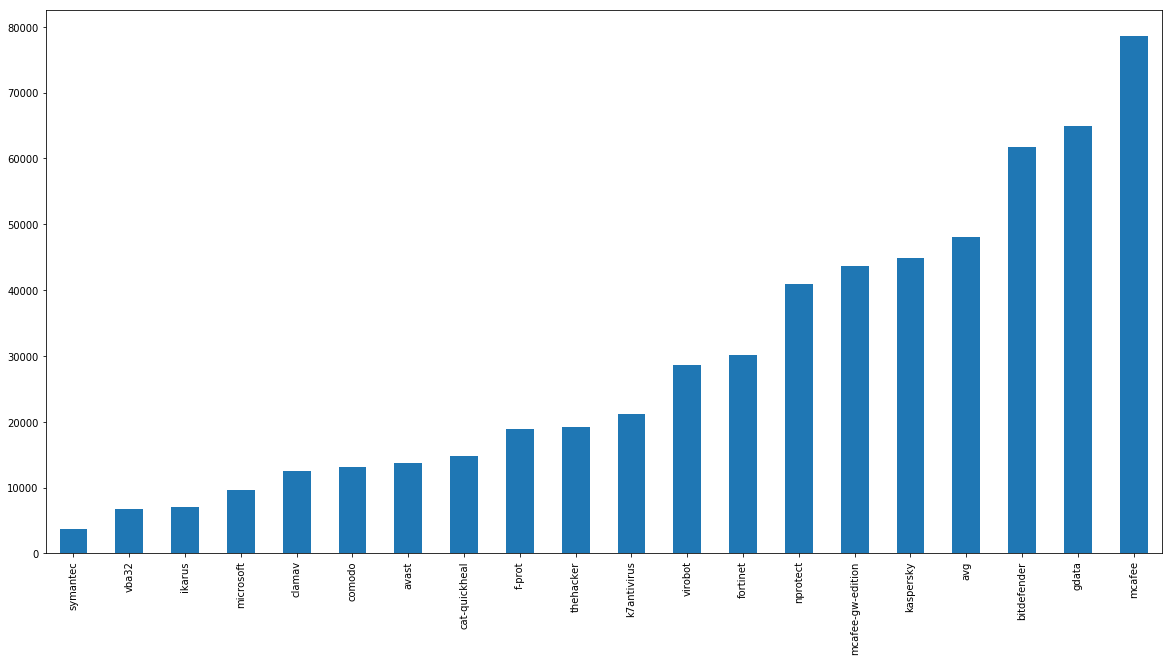

count       20.000000
mean     29095.850000
std      21768.766489
min       3638.000000
25%      13011.500000
50%      20183.500000
75%      43993.000000
max      78644.000000
dtype: float64

In [140]:
vendors_unique_names_top = pe32_av_top.replace('clean', np.nan).apply(pd.Series.nunique).sort_values()
vendors_unique_names_top.plot(kind='bar', figsize=(20, 10), xticks=np.arange(len(vendors_unique_names_top)))
plt.xticks(rotation='vertical')
plt.show()

display(vendors_unique_names_top.describe())

# Count of different classifications number

In [150]:
vendors_class_count_top = pe32_av_top.replace('clean', np.nan).apply(pd.Series.nunique, axis=1)
vendors_class_count_top = vendors_class_count_top[vendors_class_count_top != 0].value_counts()

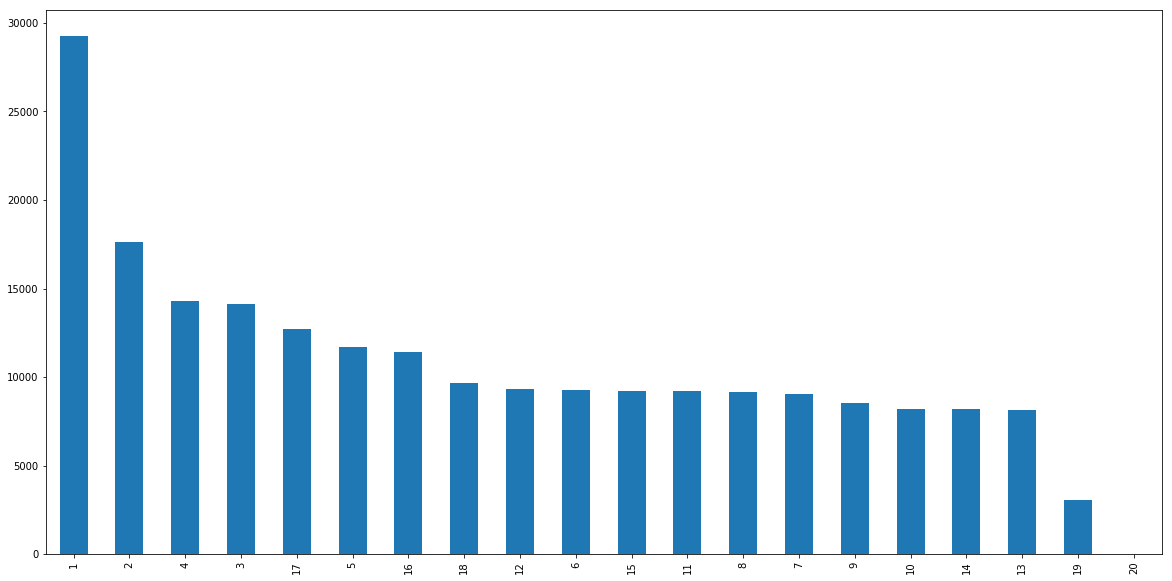

In [151]:
vendors_class_count_top.plot(kind='bar', figsize=(20, 10), xticks=np.arange(len(vendors_class_count_top)))
plt.show()